In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time
import datetime

In [ ]:
data = load_breast_cancer()

In [ ]:
X = data.data
y = data.target

In [4]:
X.shape

(569, 30)

In [5]:
np.unique(y)

array([0, 1])

# 降维观察

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X_dr = PCA(2).fit_transform(X)

In [8]:
X_dr.shape

(569, 2)

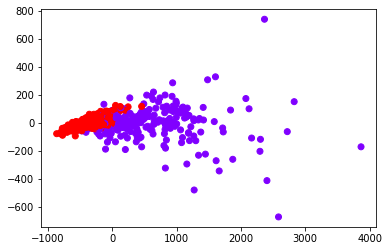

In [9]:
plt.scatter(X_dr[:, 0], X_dr[:, 1], c=y, cmap="rainbow")
plt.show()

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X, y, test_size=0.3, random_state=420)

In [ ]:
Kernel = ["linear", "poly","rbf", "sigmoid"]

In [24]:
for kernel in Kernel:
    time0 = time()
    clf = SVC(kernel=kernel,
              gamma="auto",
              degree = 1,
              # 使用多大的内存来计算，单位MB
              cache_size=5000).fit(Xtrain, Ytrain)
    print("The accuracy under kernel %s is %f" %
          (kernel, clf.score(Xtest, Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.929825
00:00:365404
The accuracy under kernel poly is 0.923977
00:00:044428
The accuracy under kernel rbf is 0.596491
00:00:015438
The accuracy under kernel sigmoid is 0.596491
00:00:007338


# 可以发现，当`degree`等于3时，`poly`核函数跑不出结果，这是因为数据量纲不统一，且存在偏态问题

In [ ]:
from sklearn.preprocessing import StandardScaler
X= StandardScaler().fit_transform(X)

In [30]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X, y, test_size=0.3, random_state=420)

Kernel = ["linear", "poly","rbf", "sigmoid"]

for kernel in Kernel:
    time0 = time()
    clf = SVC(kernel=kernel,
              gamma="auto",
              degree = 1,
              # 使用多大的内存来计算，单位MB
              cache_size=5000).fit(Xtrain, Ytrain)
    print("The accuracy under kernel %s is %f" %
          (kernel, clf.score(Xtest, Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.976608
00:00:006783
The accuracy under kernel poly is 0.964912
00:00:004586
The accuracy under kernel rbf is 0.970760
00:00:005578
The accuracy under kernel sigmoid is 0.953216
00:00:003959
